# Part I: Basic Data loading

This will install a library I helped write called 'Pyrfume', which lets you do lots of odor prediction tasks.

In [ ]:
pip install -q pyrfume

In [ ]:
# Reset NumPy and all dependent libraries(Comment or uncomment if code isn't working. Sometimes code works when they are commented and sometimes when they are not)
'''
!pip uninstall -y numpy pandas matplotlib seaborn scikit-learn pyrfume rdkit
!pip install "numpy<2.0"
!pip install pandas matplotlib seaborn scikit-learn pyrfume rdkit
'''


'\n!pip uninstall -y numpy pandas matplotlib seaborn scikit-learn pyrfume rdkit\n!pip install "numpy<2.0"\n!pip install pandas matplotlib seaborn scikit-learn pyrfume rdkit\n'

In [ ]:
import numpy as np
print(np.__version__)

1.26.4


This imports some standard libraries:

In [ ]:
import numpy as np
import os
import pandas as pd
import pyrfume
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/


'Ant Wars.gdoc'
'Approval-Form-Courses-for-a-Major (2).pdf'
'AttestationofOutsideSupport (1).pdf'
 AttestationofOutsideSupport.gdoc
 AttestationofOutsideSupport.pdf
"Bates Men's Club Soccer - September.gdoc"
"Bates Men's Club Soccer - September.pdf"
'BIDMC CITI Training and Affiliation Instructions.gdoc'
'BIDMC CITI Training and Affiliation Instructions.pdf'
'CAT Worksheet #17 (2).pdf'
'Club Soccer Sign Up Sheet.gsheet'
' Club Soccer Sport Budget Request 2024-2025.gsheet'
'Club Soccer Treasurer'
'Colab Notebooks'
'Copy of Comp Neuro Midterm.gdoc'
'Copy of Discussion 10 EXAMPLE_Partial Sums of Sequences_11.9.21_11.11.21.gsheet'
'Copy of Varun Bose Calculus II Discussion 7 Synthesis_Fall 2021.gdoc'
'Cover Letter Dining Cashier.gdoc'
'Credit Underload Request Statement Varun Bose.gdoc'
'CS5008 Roux'
 data
'data (1)'
'DCS 206 .gslides'
'Eli Reimbursement Request Letter.gdoc'
'Gallery Walk  - Pie chart 1.gsheet'
'Graduate School Applications'
 IMG-0105.jpg
 IMG_0768.jpg
 Internship
'Interns

In [ ]:
!ls "/content/drive/MyDrive/Varun Bose/data/"

mordred.csv	      omp8x_3_high.txt	   omp8x_smarts42_ids.mat
mordred_features.csv  omp8x_3_low.txt	   omp8x_smiles.txt
omp8x_1_high.txt      omp8x_4_high.txt	   Pashkovski2018.pdf
omp8x_1_low.txt       omp8x_4_low.txt	   smarts_features.csv
omp8x_2_high.txt      omp8x_odornames.txt
omp8x_2_low.txt       omp8x_smarts42.csv


Let's load our data. From the directory that I shared you on, you're going to need to pull in three files:



*   omp8x_1_high.txt
*   omp8x_odornames.txt
*   omp8x_smiles.txt



Here's what the basic data looks like. A big ol' table of molecules x glomeruli. Note that there's a bunch of zeros:

In [ ]:
os.chdir("/content/drive/MyDrive/Varun Bose/data/")
data = pd.read_csv('omp8x_1_high.txt', header=None).T
data_1_low = pd.read_csv('omp8x_1_low.txt', header=None).T
data_2_high = pd.read_csv('omp8x_2_high.txt', header=None).T
data_2_low = pd.read_csv('omp8x_2_low.txt', header=None).T
data_3_high = pd.read_csv('omp8x_3_high.txt', header=None).T
data_3_low = pd.read_csv('omp8x_3_low.txt', header=None).T
data_4_high = pd.read_csv('omp8x_4_high.txt', header=None).T
data_4_low = pd.read_csv('omp8x_4_low.txt', header=None).T

data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,0.000000,34.099167,0.000000,25.597498,24.112936,0.0,0.000000,0.000000,39.995007,0.000000,...,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0
1,68.723160,63.237507,36.858475,0.000000,0.000000,0.0,0.000000,46.879005,57.774006,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,103.552513,58.486160,0.000000,0.000000,0.0,0.000000,95.037987,34.717999,0.000000,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
3,65.621048,78.804161,0.000000,0.000000,0.000000,0.0,36.869999,29.566006,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,95.605247,90.665833,0.000000,0.000000,0.000000,0.0,68.582504,95.319992,0.000000,0.000000,...,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,-0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,86.015785,72.919167,41.400005,0.000000,0.000000,0.0,0.000000,52.224998,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
7,0.000000,109.139137,49.321552,0.000000,0.000000,0.0,0.000000,88.236000,38.197998,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
8,0.000000,118.567497,78.689232,0.000000,0.000000,0.0,0.000000,126.621994,0.000000,103.174438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
9,107.633690,111.796661,0.000000,0.000000,0.000000,0.0,90.894989,67.070007,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0


Viewing it as an image makes it much tidier:

Text(0, 0.5, 'Odorants')

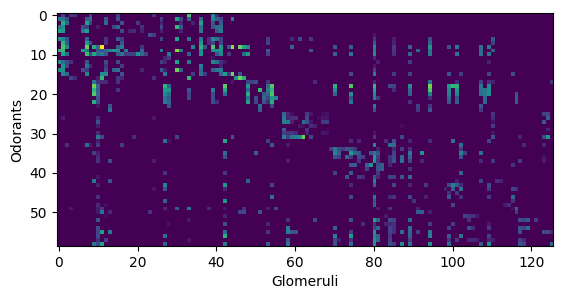

In [ ]:
plt.imshow(data)
plt.xlabel('Glomeruli')
plt.ylabel('Odorants')

The list of molecules lives in a different file. Let's grab it:



In [ ]:
odorants = pd.read_csv('omp8x_odornames.txt', header=None)
odorants.head(10)

,0
0,C7 propionic acid
1,C1 butyric acid
2,C2 2-methylbutyric acid
3,C3 valeric acid
4,C6 isovaleric acid
5,D15 methacrolein
6,D16 butyraldehyde
7,D1 2-methylbutyraldehyde
8,D2 trans-2-methyl-2-butenal
9,D8 valeraldehyde


And this file gives us all kinds of molecular info about chemical classes, etc...

In [ ]:
molecule_info = pd.read_csv('omp8x_smiles.txt', header=None)
molecule_info.head(10)

,0
0,CCC(O)=O
1,CCCC(O)=O
2,CCC(C)C(O)=O
3,CCCCC(O)=O
4,CC(C)CC(O)=O
5,CC(=C)C=O
6,CCCC=O
7,CCC(C)C=O
8,C\C=C(/C)C=O
9,CCCCC=O


This is a little function that will tidy things up for us:

In [ ]:
# Load odorants
def load_odorants():
    odorants = pd.concat(
        [
            pd.read_csv('omp8x_odornames.txt', header=None, names=['Odorant']),
            pd.read_csv('omp8x_smiles.txt', header=None, names=['SMILES'])
        ],
        axis=1
    ).rename_axis('Odorant #')
    odorants['Name'] = odorants['Odorant'].apply(lambda x: ' '.join(x.split()[1:]))
    odorants['Group'] = odorants['Odorant'].apply(lambda x: x.split()[0][0])

    # 'P4 2-ethyl-3-methylpyrazine' and 'P3 2-methoxy-3(5 or 6)-isopropylpyrazine' have duplicate SMILES
    # Checking with M.W., it appears the P3 SMILES is incorrect; fix here using M.W.'s provided correction
    odorants.loc[odorants['Odorant'] == 'P3 2-methoxy-3(5 or 6)-isopropylpyrazine', 'SMILES'] = 'CC(C)C1=CN=CC(=N1)OC'

    # Encode Group as int for plotting purposes
    odorants['Group_num'] = LabelEncoder().fit_transform(odorants['Group'])

    return odorants


And here's what we've got now:

In [ ]:
odorants = load_odorants()
odorants.head(10)

,Odorant,SMILES,Name,Group,Group_num
Odorant #,,,,,
0,C7 propionic acid,CCC(O)=O,propionic acid,C,0
1,C1 butyric acid,CCCC(O)=O,butyric acid,C,0
2,C2 2-methylbutyric acid,CCC(C)C(O)=O,2-methylbutyric acid,C,0
3,C3 valeric acid,CCCCC(O)=O,valeric acid,C,0
4,C6 isovaleric acid,CC(C)CC(O)=O,isovaleric acid,C,0
5,D15 methacrolein,CC(=C)C=O,methacrolein,D,1
6,D16 butyraldehyde,CCCC=O,butyraldehyde,D,1
7,D1 2-methylbutyraldehyde,CCC(C)C=O,2-methylbutyraldehyde,D,1
8,D2 trans-2-methyl-2-butenal,C\C=C(/C)C=O,trans-2-methyl-2-butenal,D,1


Folding the odorant info into the glomerular matrix:

In [ ]:
data.set_index(odorants['Odorant'], inplace=True)
print(data.shape)
print(data.max().max())
print(data.min().min())
data_1_low.set_index(odorants['Odorant'], inplace=True)
print(data_1_low.shape)
print(data_1_low.max().max())
print(data_1_low.min().min())
data_2_high.set_index(odorants['Odorant'], inplace=True)
print(data_2_high.shape)
print(data_2_high.max().max())
print(data_2_high.min().min())
data_2_low.set_index(odorants['Odorant'], inplace=True)
print(data_2_low.shape)
print(data_2_low.max().max())
print(data_2_low.min().min())
data_3_high.set_index(odorants['Odorant'], inplace=True)
print(data_3_high.shape)
print(data_3_high.max().max())
print(data_3_high.min().min())
data_3_low.set_index(odorants['Odorant'], inplace=True)
print(data_3_low.shape)
print(data_3_low.max().max())
print(data_3_low.min().min())
data_4_high.set_index(odorants['Odorant'], inplace=True)
print(data_4_low.shape)
print(data_4_high.max().max())
print(data_4_high.min().min())
data_4_low.set_index(odorants['Odorant'], inplace=True)
print(data_4_low.shape)
print(data_4_low.max().max())
print(data_4_low.min().min())
#Combined Median of all datasets
print(data_1_low.stack().median())
print(data.stack().median())
print(data_2_high.stack().median())
print(data_2_low.stack().median())
print(data_3_high.stack().median())
print(data_3_low.stack().median())
print(data_4_high.stack().median())
print(data_4_low.stack().median())
#data.head(10)

(59, 126)
164.764678955078
0.0
(59, 126)
113.296600341797
0.0
(59, 119)
144.62043762207
0.0
(59, 119)
146.321105957031
0.0
(59, 159)
126.745918273926
0.0
(59, 159)
109.6123046875
-0.0
(59, 163)
190.902786254883
0.0
(59, 163)
127.296325683594
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0


# Part II: Basic Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# For visualizing the dendrogram
from scipy.cluster.hierarchy import dendrogram

In [ ]:
clustering = AgglomerativeClustering(n_clusters=10).fit(data)

In [ ]:
clustering.fit(data)

AgglomerativeClustering(n_clusters=10)

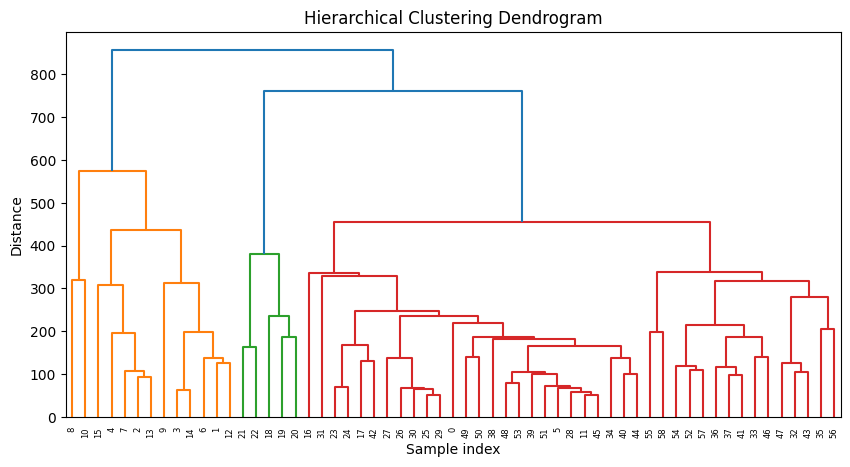

In [ ]:
Z = linkage(data, method='ward')  # 'ward' minimizes the variance of the clusters being merged

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

The 'clustering' object gives us back a lot of stuff:

In [ ]:
dir(clustering)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'children_',
 'compute_distances',
 'compute_full_tree',
 'connectivity',
 'distance_threshold',
 '

We can easily see which cluster each of the odorants belongs to like this. Note that these clusters are defined in terms of their **glomerular** similarity. Not any kind of chemical features

In [ ]:
clustering.labels_

array([3, 2, 5, 2, 5, 3, 2, 5, 0, 2, 0, 3, 2, 5, 2, 5, 8, 3, 4, 4, 4, 6,
       6, 3, 3, 3, 3, 3, 3, 3, 3, 9, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 7, 1, 1, 7])

If I was curious about which molecules belong to a particular cluster, I do that like this:

In [ ]:
odorants.iloc[np.where(clustering.labels_==1)]

,Odorant,SMILES,Name,Group,Group_num
Odorant #,,,,,
32,P12 2-acetylpyridine,CC(=O)c1ccccn1,2-acetylpyridine,P,7
33,P13 4-tert-butylpyridine,CC(C)(C)c1ccncc1,4-tert-butylpyridine,P,7
35,P2 2-methoxy-3-methylpyrazine,COc1nccnc1C,2-methoxy-3-methylpyrazine,P,7
36,P4 2-ethyl-3-methylpyrazine,CCc1nccnc1C,2-ethyl-3-methylpyrazine,P,7
37,"P16 2,3-dimethylpyrazine",Cc1nccnc1C,"2,3-dimethylpyrazine",P,7
41,"P18 5H-5-methyl-6,7-dihydrocyclopenta[b]pyrazine",C[C@@H]1CCC2=C1N=CC[NH2+]2,"5H-5-methyl-6,7-dihydrocyclopenta[b]pyrazine",P,7
43,R11 acetophenone,CC(=O)c1ccccc1,acetophenone,R,8
46,R31 propiophenone,CCC(=O)c1ccccc1,propiophenone,R,8
47,R3 methyl salicylate,COC(=O)c1ccccc1O,methyl salicylate,R,8


And here's a little snippet to make your life easier :-)

In [ ]:
cluster = 3
odorants.iloc[np.where(clustering.labels_==cluster)]

,Odorant,SMILES,Name,Group,Group_num
Odorant #,,,,,
0,C7 propionic acid,CCC(O)=O,propionic acid,C,0
5,D15 methacrolein,CC(=C)C=O,methacrolein,D,1
11,E1 butyl acetate,CCCCOC(C)=O,butyl acetate,E,2
17,F6 5-methylfurfural,Cc1oc(C=O)cc1,5-methylfurfural,F,3
23,L2 1-hexanol,CCCCCCO,1-hexanol,L,5
24,L8 cis-3-hexenol,CC\C=C/CCO,cis-3-hexenol,L,5
25,N6 butylamine,CCCCN,butylamine,N,6
26,N11 2-methylbutylamine,CC[C@@H](C)C[NH3+],2-methylbutylamine,N,6
27,N15 N-butyldimethylamine,CCCC[NH+](C)C,N-butyldimethylamine,N,6


# Checking How Many NANs in Each Row and Removing Accordingly(Starting from 2 Low Concentration(2 High concentration is fine))

In [ ]:
print(data.shape)
print(data_2_low.shape)
print(data_2_high.shape)

(59, 126)
(59, 119)
(59, 119)


In [ ]:

#data_2_low.loc['E1 butyl acetate']
data_2_low[data_2_low.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
Odorant,,,,,,,,,,,,,,,,,,,,,


In [ ]:
#See how many NANs in each row of Dataframes
#print(data.isna().sum(axis = 1))
#print(data_2_low.isna().sum(axis=1))
data_2_high.isna().any().any()


False

# Glomeruli Correlationn Heatmaps







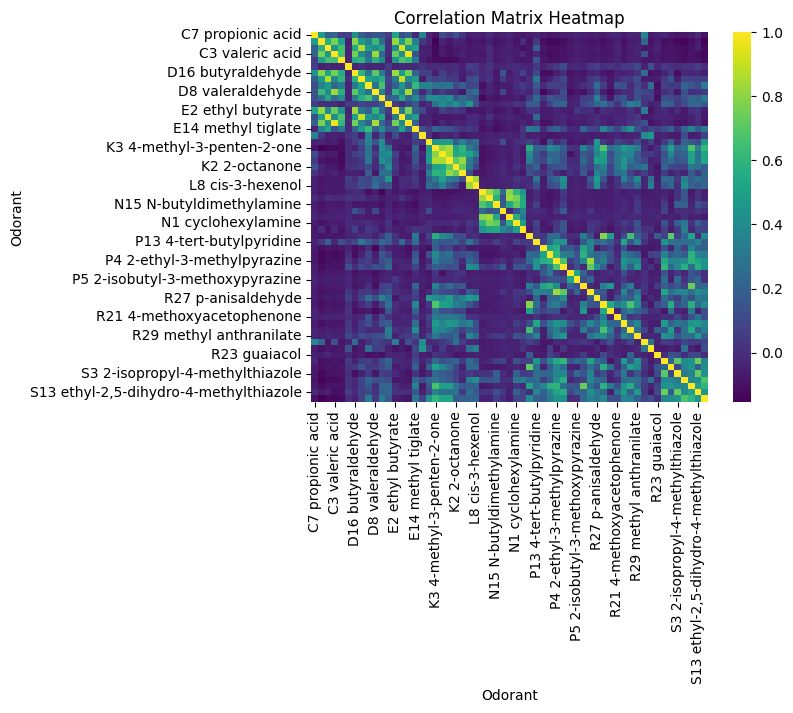

In [ ]:
import seaborn as sns

sns.heatmap(data.T.corr(), annot = False, cmap = "viridis", fmt = ".2f", linewidths=0.0)
plt.title("Correlation Matrix Heatmap")
plt.show()

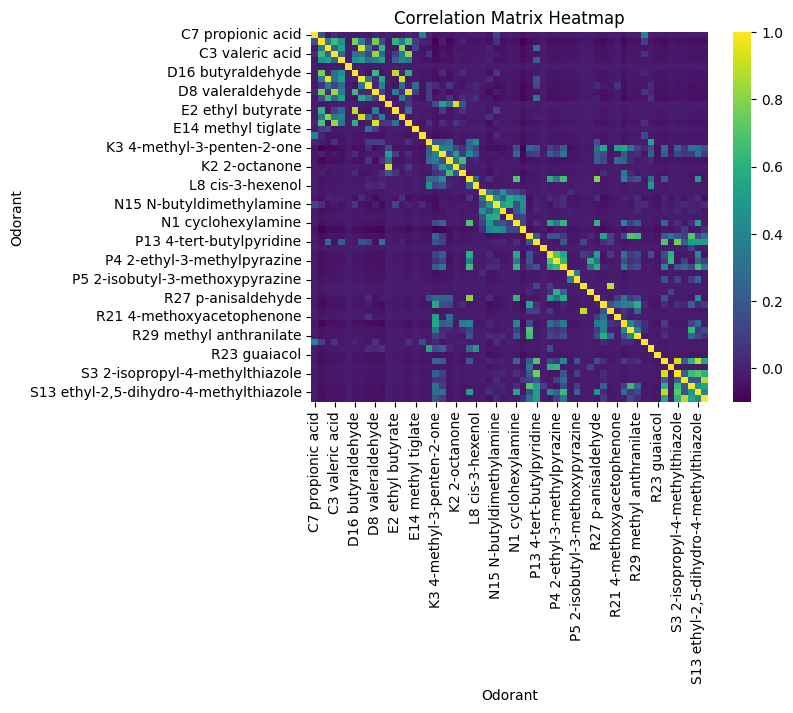

In [ ]:
sns.heatmap(data_1_low.T.corr(), annot = False, cmap = "viridis", fmt = ".2f", linewidths=0.0)
plt.title("Correlation Matrix Heatmap")
plt.show()

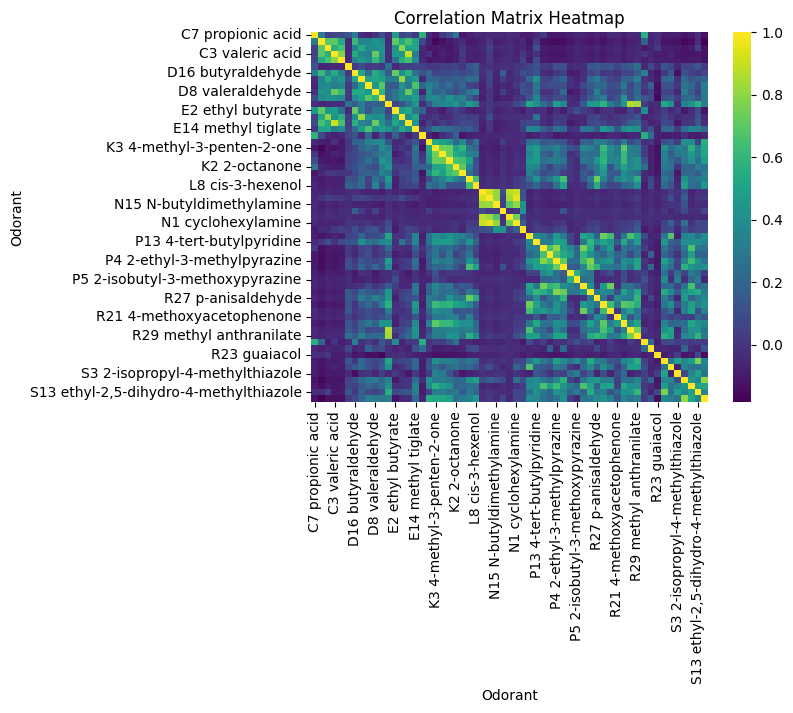

In [ ]:
sns.heatmap(data_2_high.T.corr(), annot = False, cmap = "viridis", fmt = ".2f", linewidths=0.0)
plt.title("Correlation Matrix Heatmap")
plt.show()

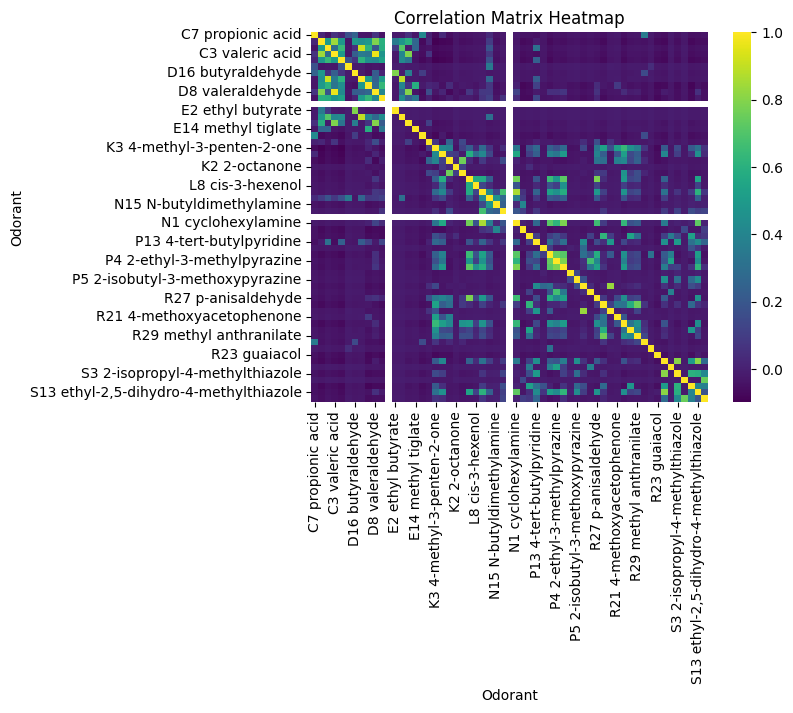

In [ ]:
sns.heatmap(data_2_low.T.corr(), annot = False, cmap = "viridis", fmt = ".2f", linewidths=0.0)
plt.title("Correlation Matrix Heatmap")
plt.show()

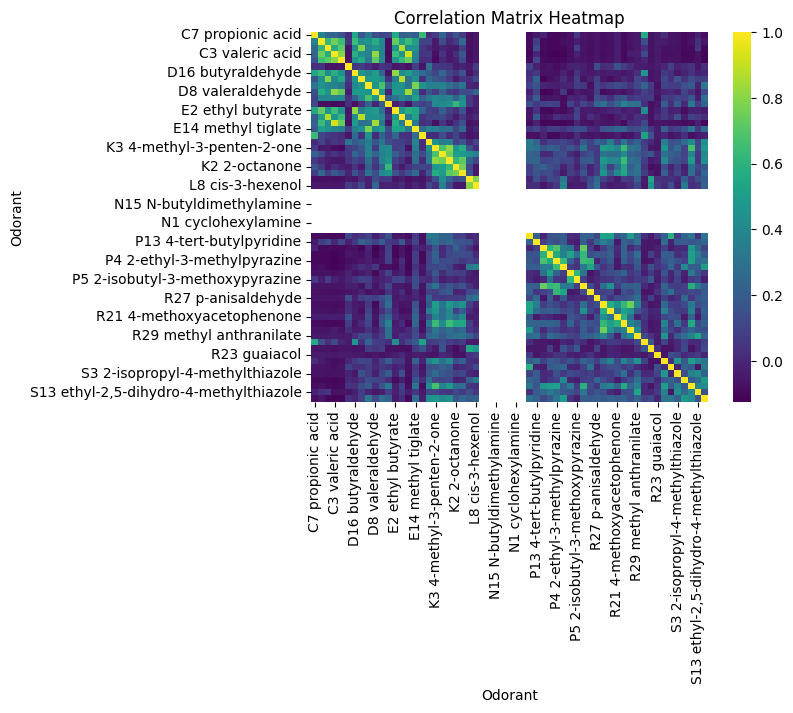

In [ ]:
sns.heatmap(data_3_high.T.corr(), annot = False, cmap = "viridis", fmt = ".2f", linewidths=0.0)
plt.title("Correlation Matrix Heatmap")
plt.show()

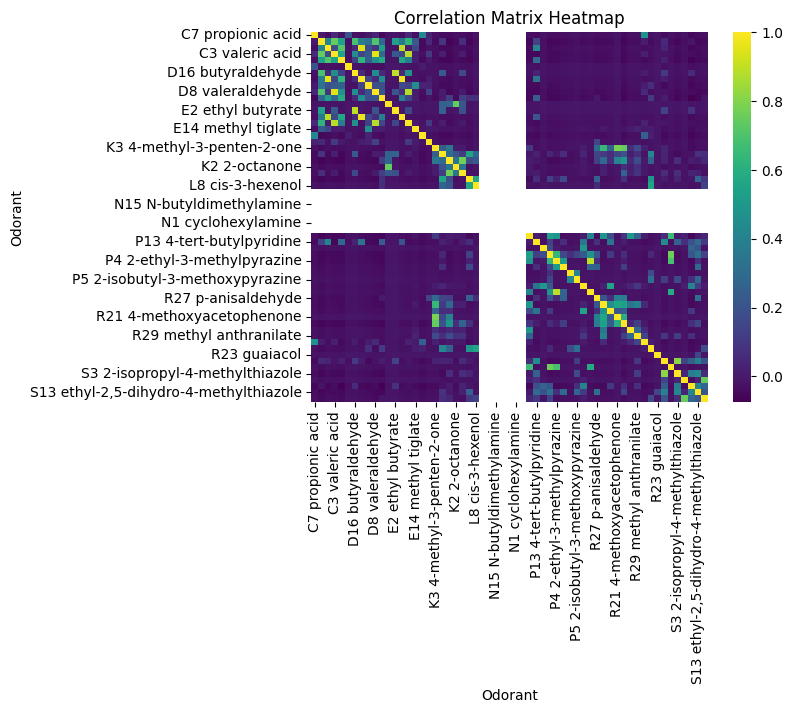

In [ ]:
sns.heatmap(data_3_low.T.corr(), annot = False, cmap = "viridis", fmt = ".2f", linewidths=0.0)
plt.title("Correlation Matrix Heatmap")
plt.show()

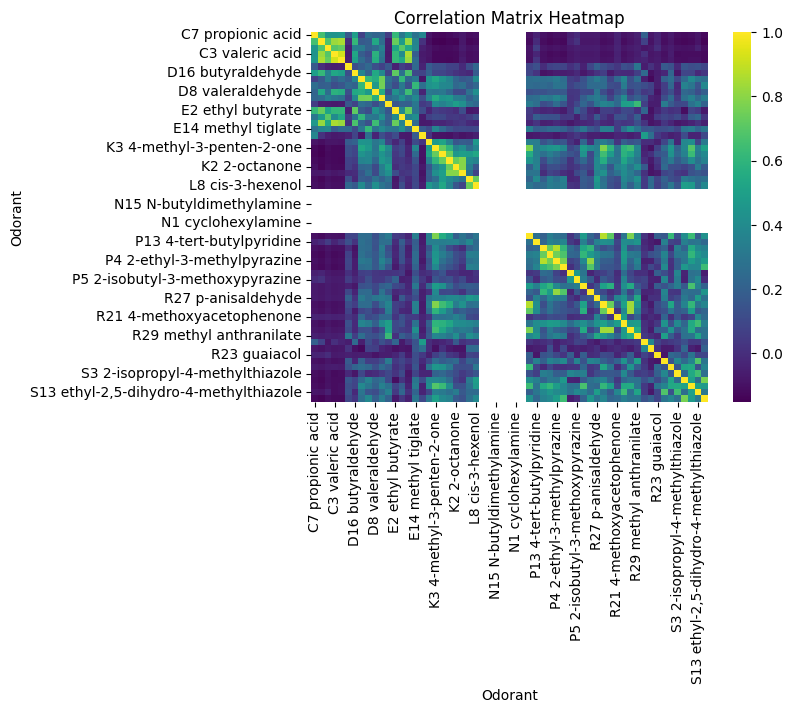

In [ ]:
sns.heatmap(data_4_high.T.corr(), annot = False, cmap = "viridis", fmt = ".2f", linewidths=0.0)
plt.title("Correlation Matrix Heatmap")
plt.show()

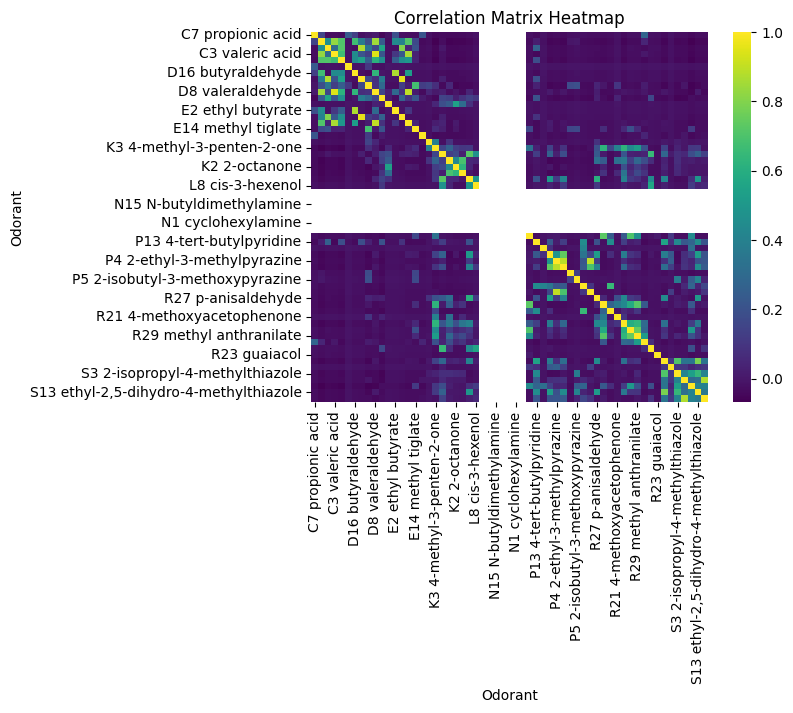

In [ ]:
sns.heatmap(data_4_low.T.corr(), annot = False, cmap = "viridis", fmt = ".2f", linewidths=0.0)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Initializing and Creating Heatmap for Mordred

In [ ]:
from sklearn.feature_selection import VarianceThreshold
mordred = pd.read_csv('mordred_features.csv', header=0, index_col = 0)
mordred.head(10)

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nHetero,nH,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
Odorant #,,,,,,,,,,,,,,,,,,,,,
0,3.047207,3.305183,1.0,0.0,0.0,0.0,11.0,5.0,2.0,6.0,...,0.0,6.834109,27.254130,74.036779,6.730616,18.0,2.0,16.0,14.0,1.333333
1,3.754314,4.057055,1.0,0.0,0.0,0.0,14.0,6.0,2.0,8.0,...,0.0,7.131699,29.439488,88.052429,6.289459,32.0,3.0,20.0,18.0,1.583333
2,4.530370,5.004088,1.0,0.0,0.0,0.0,17.0,7.0,2.0,10.0,...,0.0,7.890957,32.688753,102.068080,6.004005,46.0,6.0,26.0,26.0,1.777778
3,4.461420,4.736714,1.0,0.0,0.0,0.0,17.0,7.0,2.0,10.0,...,0.0,7.321850,31.336140,102.068080,6.004005,52.0,4.0,24.0,22.0,1.833333
4,4.680200,4.942478,1.0,0.0,0.0,0.0,17.0,7.0,2.0,10.0,...,0.0,7.655864,32.211905,102.068080,6.004005,48.0,4.0,26.0,24.0,1.666667
5,3.047207,3.305183,0.0,0.0,0.0,0.0,11.0,5.0,1.0,6.0,...,0.0,6.834109,27.254130,70.041865,6.367442,18.0,2.0,16.0,14.0,1.333333
6,2.828427,3.146264,0.0,0.0,0.0,0.0,13.0,5.0,1.0,8.0,...,0.0,6.192362,25.583106,72.057515,5.542886,20.0,2.0,14.0,12.0,1.500000
7,3.644924,4.097495,0.0,0.0,0.0,0.0,16.0,6.0,1.0,10.0,...,0.0,7.280008,29.753427,86.073165,5.379573,31.0,4.0,20.0,19.0,1.666667
8,3.644924,4.097495,0.0,0.0,0.0,0.0,14.0,6.0,1.0,8.0,...,0.0,7.280008,29.753427,84.057515,6.004108,31.0,4.0,20.0,19.0,1.666667


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

#Save original index and column names
index_names = mordred.index
column_names = mordred.columns

#Apply MinMax Scaling
scaler = MinMaxScaler()
mordred_scaled = scaler.fit_transform(mordred)

#Apply Variance Thresholding
selector = VarianceThreshold(threshold = 0.03) #Remove columns with 0 variance
mordred_var = selector.fit_transform(mordred_scaled)

#Update column names
filtered_columns = column_names[selector.get_support()]
mordred_temp = pd.DataFrame(mordred_var, index=index_names, columns=filtered_columns)

# Compute Correlation matrix and upper triangle
corr_matrix = mordred_temp.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify redundant features with Correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop them
mordred_temp = mordred_temp.drop(columns=to_drop)

mordred = mordred_temp


#print(mordred_temp.shape)
mordred.head(10)

,ABC,nAcid,nBase,nAromAtom,nAtom,nHetero,nH,nC,nN,nO,...,JGI1,JGI2,JGI3,JGI4,JGI5,JGI6,JGT10,TopoShapeIndex,TSRW10,mZagreb2
Odorant #,,,,,,,,,,,,,,,,,,,,,
0,0.037493,1.0,0.0,0.0,0.000000,0.5,0.071429,0.000000,0.0,0.666667,...,0.882353,0.588235,0.000000,0.00,0.0,0.0,0.723762,0.500000,0.058707,0.000000
1,0.158673,1.0,0.0,0.0,0.176471,0.5,0.214286,0.166667,0.0,0.666667,...,0.670588,0.423529,0.636364,0.00,0.0,0.0,0.691534,1.000000,0.135485,0.163636
2,0.291669,1.0,0.0,0.0,0.352941,0.5,0.357143,0.333333,0.0,0.666667,...,0.764706,0.941176,0.318182,0.00,0.0,0.0,0.834257,1.000000,0.249640,0.290909
3,0.279852,1.0,0.0,0.0,0.352941,0.5,0.357143,0.333333,0.0,0.666667,...,0.529412,0.313725,0.477273,0.48,0.0,0.0,0.616551,0.666667,0.202119,0.327273
4,0.317346,1.0,0.0,0.0,0.352941,0.5,0.357143,0.333333,0.0,0.666667,...,1.000000,0.235294,0.954545,0.00,0.0,0.0,1.000000,1.000000,0.232887,0.218182
5,0.037493,0.0,0.0,0.0,0.000000,0.0,0.071429,0.166667,0.0,0.333333,...,0.882353,0.588235,0.000000,0.00,0.0,0.0,0.723762,0.500000,0.058707,0.000000
6,0.000000,0.0,0.0,0.0,0.117647,0.0,0.214286,0.166667,0.0,0.333333,...,0.176471,0.313725,0.477273,0.00,0.0,0.0,0.202746,1.000000,0.000000,0.109091
7,0.139926,0.0,0.0,0.0,0.294118,0.0,0.357143,0.333333,0.0,0.333333,...,0.670588,0.752941,0.238636,0.00,0.0,0.0,0.673809,1.000000,0.146514,0.218182
8,0.139926,0.0,0.0,0.0,0.176471,0.0,0.214286,0.333333,0.0,0.333333,...,0.670588,0.752941,0.238636,0.00,0.0,0.0,0.673809,1.000000,0.146514,0.218182


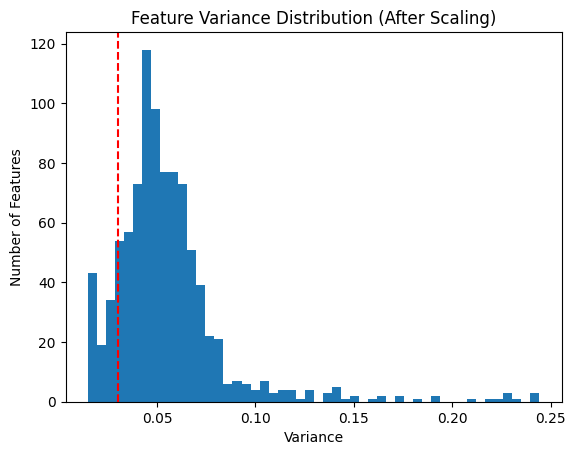

In [ ]:
#Variance Distribution graph to see where to cut off variance thresholding
import matplotlib.pyplot as plt
variances = np.var(mordred_scaled, axis=0)
plt.hist(variances, bins=50)
plt.axvline(0.03, color='red', linestyle='--')
plt.title("Feature Variance Distribution (After Scaling)")
plt.xlabel("Variance")
plt.ylabel("Number of Features")
plt.show()
#0.03 seems good

In [ ]:
print(data.shape)
print(data_1_low.shape)
print(data_2_low.shape)
print(data_2_high.shape)
data.head(10)
#data.index

(59, 126)
(59, 126)
(59, 119)
(59, 119)


,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
Odorant,,,,,,,,,,,,,,,,,,,,,
C7 propionic acid,0.000000,34.099167,0.000000,25.597498,24.112936,0.0,0.000000,0.000000,39.995007,0.000000,...,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0
C1 butyric acid,68.723160,63.237507,36.858475,0.000000,0.000000,0.0,0.000000,46.879005,57.774006,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C2 2-methylbutyric acid,0.000000,103.552513,58.486160,0.000000,0.000000,0.0,0.000000,95.037987,34.717999,0.000000,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
C3 valeric acid,65.621048,78.804161,0.000000,0.000000,0.000000,0.0,36.869999,29.566006,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C6 isovaleric acid,95.605247,90.665833,0.000000,0.000000,0.000000,0.0,68.582504,95.319992,0.000000,0.000000,...,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D15 methacrolein,0.000000,-0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D16 butyraldehyde,86.015785,72.919167,41.400005,0.000000,0.000000,0.0,0.000000,52.224998,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
D1 2-methylbutyraldehyde,0.000000,109.139137,49.321552,0.000000,0.000000,0.0,0.000000,88.236000,38.197998,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
D2 trans-2-methyl-2-butenal,0.000000,118.567497,78.689232,0.000000,0.000000,0.0,0.000000,126.621994,0.000000,103.174438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0


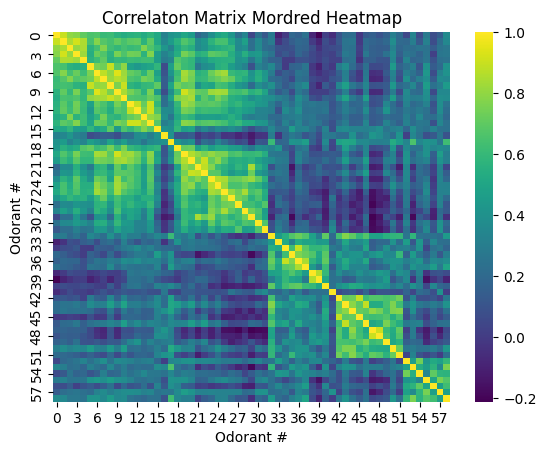

In [ ]:
#Plot Mordred Heatmap
sns.heatmap(mordred.T.corr(), annot=False, cmap="viridis", fmt=".2f", linewidths=0.0)

plt.title("Correlaton Matrix Mordred Heatmap")
plt.show()

# Viewing SMARTS info


In [ ]:
smarts = pd.read_csv('smarts_features.csv', header = 0, index_col = 0)
smarts.head(10)


,0,1,2,4,5,6,8,9,10,11,...,22,23,24,25,26,27,28,36,37,38
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
smarts_odorants = pd.read_csv('omp8x_smarts42.csv', header = 0, index_col = 0)
smarts_odorants.shape

(59, 42)

# Computing Morgan Values and Creating Morgan Heatmap


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

In [ ]:
# Function to compute Morgan fingerprints
def compute_morgan(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    else:
        return None  # Handle invalid SMILES

# Compute fingerprints and store them as a new column
odorants["Morgan_Fingerprint"] = odorants["SMILES"].apply(compute_morgan)

# Display the updated DataFrame
print(type(odorants["Morgan_Fingerprint"].iloc[0]))
odorants.head()

<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>


[21:30:47] WARNING: not removing hydrogen atom without neighbors


,Odorant,SMILES,Name,Group,Group_num,Morgan_Fingerprint
Odorant #,,,,,,
0,C7 propionic acid,CCC(O)=O,propionic acid,C,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,C1 butyric acid,CCCC(O)=O,butyric acid,C,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,C2 2-methylbutyric acid,CCC(C)C(O)=O,2-methylbutyric acid,C,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,C3 valeric acid,CCCCC(O)=O,valeric acid,C,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,C6 isovaleric acid,CC(C)CC(O)=O,isovaleric acid,C,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
#Convert fingerprints to bit matrix
bit_matrix = []
for fp in odorants["Morgan_Fingerprint"]:
    arr = np.zeros((2048,), dtype=np.uint8)
    DataStructs.ConvertToNumpyArray(fp, arr)
    bit_matrix.append(arr)

bit_matrix = np.array(bit_matrix)

#Remove all-1 columns only
not_all_ones_mask = ~(bit_matrix.all(axis=0))  # keep only columns that are not all 1s
filtered_matrix = bit_matrix[:, not_all_ones_mask]

#Rebuild fingerprints from filtered matrix
def array_to_bitvect(arr):
    bv = DataStructs.ExplicitBitVect(len(arr))
    for i, bit in enumerate(arr):
        if bit == 1:
            bv.SetBit(i)
    return bv

fingerprints = [array_to_bitvect(row) for row in filtered_matrix]

In [ ]:
# Create an empty similarity matrix
num_molecules = len(fingerprints)
tanimoto_matrix = np.zeros((num_molecules, num_molecules))

# Compute pairwise Tanimoto similarity
for i in range(num_molecules):
    for j in range(i, num_molecules):  # Only compute upper triangle (matrix is symmetric)
        sim = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
        tanimoto_matrix[i, j] = sim
        tanimoto_matrix[j, i] = sim  # Fill symmetric value

# Convert to a DataFrame for easy viewing
tanimoto_df = pd.DataFrame(tanimoto_matrix, index=odorants["Odorant"], columns=odorants["Odorant"])

# Display the similarity matrix
tanimoto_df.head()

Odorant,C7 propionic acid,C1 butyric acid,C2 2-methylbutyric acid,C3 valeric acid,C6 isovaleric acid,D15 methacrolein,D16 butyraldehyde,D1 2-methylbutyraldehyde,D2 trans-2-methyl-2-butenal,D8 valeraldehyde,...,R40 phenyl propionate,R10 m-cresol,R23 guaiacol,S1 2-isobutylthiazole,S2 2-acetylthiazole,S3 2-isopropyl-4-methylthiazole,S5 2-methyl-2-thiazoline,"S7 2,4,5-trimethylthiazole","S13 ethyl-2,5-dihydro-4-methylthiazole",S17 4-methylthiazole
Odorant,,,,,,,,,,,,,,,,,,,,,
C7 propionic acid,1.000000,0.533333,0.388889,0.470588,0.411765,0.166667,0.222222,0.200000,0.157895,0.200000,...,0.333333,0.080000,0.076923,0.066667,0.148148,0.034483,0.040000,0.041667,0.107143,0.040000
C1 butyric acid,0.533333,1.000000,0.333333,0.647059,0.350000,0.142857,0.250000,0.173913,0.136364,0.227273,...,0.250000,0.071429,0.068966,0.060606,0.133333,0.031250,0.035714,0.037037,0.096774,0.035714
C2 2-methylbutyric acid,0.388889,0.333333,1.000000,0.304348,0.380952,0.130435,0.173913,0.318182,0.125000,0.160000,...,0.233333,0.066667,0.064516,0.121212,0.125000,0.093750,0.033333,0.034483,0.090909,0.033333
C3 valeric acid,0.470588,0.647059,0.304348,1.000000,0.318182,0.130435,0.227273,0.160000,0.125000,0.318182,...,0.233333,0.066667,0.064516,0.057143,0.125000,0.029412,0.033333,0.034483,0.090909,0.033333
C6 isovaleric acid,0.411765,0.350000,0.380952,0.318182,1.000000,0.136364,0.130435,0.217391,0.130435,0.120000,...,0.200000,0.068966,0.066667,0.161290,0.129032,0.096774,0.034483,0.035714,0.060606,0.034483


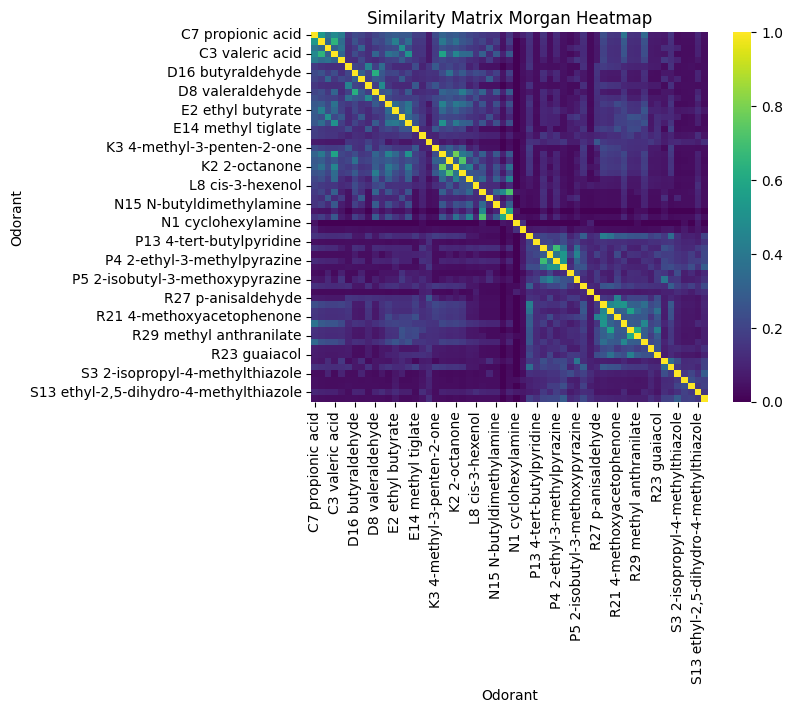

In [ ]:
#Heatmap of Morgan similarity matrix
sns.heatmap(tanimoto_df, annot = False, cmap = "viridis", fmt = ".2f", linewidths = 0.0)

plt.title("Similarity Matrix Morgan Heatmap")
plt.show()

# Pearson Tests

In [ ]:
#Store Correlation matrices as variables for Pearson Test
data_1_high_cov = data.T.corr()
data_1_low_cov = data_1_low.T.corr()
data_2_high_cov = data_2_high.T.corr()
data_2_low_cov = data_2_low.T.corr()
data_3_high_cov = data_3_high.T.corr()
data_3_low_cov = data_3_low.T.corr()
data_4_high_cov = data_4_high.T.corr()
data_4_low_cov = data_4_low.T.corr()
mordred_cov = mordred.T.corr()
morgan_cov = tanimoto_df
print(data_1_high_cov.shape)
print(mordred_cov.shape)

(59, 59)
(59, 59)


In [ ]:
#Drop all columns and rows with all Nans
data_2_low_cov = data_2_low_cov.dropna(axis = 1, how = 'all').dropna(axis=0, how='all')
data_3_high_cov = data_3_high_cov.dropna(axis = 1, how = 'all').dropna(axis=0, how='all')
data_3_low_cov = data_3_low_cov.dropna(axis = 1, how = 'all').dropna(axis=0, how='all')
data_4_high_cov = data_4_high_cov.dropna(axis = 1, how = 'all').dropna(axis=0, how='all')
data_4_low_cov = data_4_low_cov.dropna(axis = 1, how = 'all').dropna(axis=0, how='all')

In [ ]:
data_2_low_cov.shape

(57, 57)

In [ ]:
#Store values for dropped columns and rows for indexing
positions_2_low = np.arange(len(data_2_low_cov.index))
positions_3_high = np.arange(len(data_3_high_cov.index))
positions_3_low = np.arange(len(data_3_low_cov.index))
positions_4_high = np.arange(len(data_4_high_cov.index))
positions_4_low = np.arange(len(data_4_low_cov.index))

In [ ]:
#Create new mordred and morgan Correlation matrices for the NAN dropped brain datasets
mordred_2_low_cov = mordred_cov.iloc[positions_2_low, positions_2_low]
morgan_2_low_cov = morgan_cov.iloc[positions_2_low, positions_2_low]
mordred_3_high_cov = mordred_cov.iloc[positions_3_high, positions_3_high]
morgan_3_high_cov = morgan_cov.iloc[positions_3_high, positions_3_high]
mordred_3_low_cov = mordred_cov.iloc[positions_3_low, positions_3_low]
morgan_3_low_cov = morgan_cov.iloc[positions_3_low, positions_3_low]
mordred_4_high_cov = mordred_cov.iloc[positions_4_high, positions_4_high]
morgan_4_high_cov = morgan_cov.iloc[positions_4_high, positions_4_high]
mordred_4_low_cov = mordred_cov.iloc[positions_4_low, positions_4_low]
morgan_4_low_cov = morgan_cov.iloc[positions_4_low, positions_4_low]

In [ ]:
#Extract Upper Triangle of Each Correlation Matrix
data_1_high_upper = data_1_high_cov.values[np.triu_indices_from(data_1_high_cov, k=1)]
data_1_low_upper = data_1_low_cov.values[np.triu_indices_from(data_1_low_cov, k=1)]
data_2_high_upper = data_2_high_cov.values[np.triu_indices_from(data_2_high_cov, k=1)]
data_2_low_upper = data_2_low_cov.values[np.triu_indices_from(data_2_low_cov, k=1)]
data_3_high_upper = data_3_high_cov.values[np.triu_indices_from(data_3_high_cov, k=1)]
data_3_low_upper = data_3_low_cov.values[np.triu_indices_from(data_3_low_cov, k=1)]
data_4_high_upper = data_4_high_cov.values[np.triu_indices_from(data_4_high_cov, k=1)]
data_4_low_upper = data_4_low_cov.values[np.triu_indices_from(data_4_low_cov, k=1)]
mordred_upper = mordred_cov.values[np.triu_indices_from(mordred_cov, k=1)]
morgan_upper = morgan_cov.values[np.triu_indices_from(morgan_cov, k=1)]
mordred_2_low_upper = mordred_2_low_cov.values[np.triu_indices_from(mordred_2_low_cov, k=1)]
morgan_2_low_upper = morgan_2_low_cov.values[np.triu_indices_from(morgan_2_low_cov, k=1)]
mordred_3_high_upper = mordred_3_high_cov.values[np.triu_indices_from(mordred_3_high_cov, k=1)]
morgan_3_high_upper = morgan_3_high_cov.values[np.triu_indices_from(mordred_3_high_cov, k=1)]
mordred_3_low_upper = mordred_3_low_cov.values[np.triu_indices_from(mordred_3_low_cov, k=1)]
morgan_3_low_upper = morgan_3_low_cov.values[np.triu_indices_from(morgan_3_low_cov, k=1)]
mordred_4_high_upper = mordred_4_high_cov.values[np.triu_indices_from(mordred_4_high_cov, k=1)]
morgan_4_high_upper = mordred_4_high_cov.values[np.triu_indices_from(morgan_4_high_cov, k=1)]
mordred_4_low_upper = mordred_4_low_cov.values[np.triu_indices_from(mordred_4_low_cov, k=1)]
morgan_4_low_upper = morgan_4_low_cov.values[np.triu_indices_from(morgan_4_low_cov, k=1)]

In [ ]:
print(mordred_2_low_upper.shape)
print(data_2_low_upper.shape)

(1596,)
(1596,)


In [ ]:
np.isnan(data_2_low_upper).sum()

0

In [ ]:
from scipy.stats import pearsonr

In [ ]:
#1 High vs Mordred
one_high_mordred, p_value_1_h_mordred = pearsonr(data_1_high_upper, mordred_upper)

# Print results
print(f"Pearson Correlation 1 High and Mordred: {one_high_mordred}, p-value: {p_value_1_h_mordred}")

Pearson Correlation 1 High and Mordred: 0.3678136623543511, p-value: 5.962537565440131e-56


In [ ]:
#1 High vs Morgan
one_high_morgan, p_value_1_h_morgan = pearsonr(data_1_high_upper, morgan_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {one_high_morgan}, p-value: {p_value_1_h_morgan}")

Pearson Correlation 1 High and Morgan: 0.3618250372639944, p-value: 4.4980830939111743e-54


In [ ]:
#1 Low vs Mordred
one_low_mordred, p_value_1_l_mordred = pearsonr(data_1_low_upper, mordred_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {one_low_mordred}, p-value: {p_value_1_l_mordred}")

Pearson Correlation 1 High and Morgan: 0.2951074038645839, p-value: 9.982937033375285e-36


In [ ]:
#1 Low vs Morgan
one_low_morgan, p_value_1_l_morgan = pearsonr(data_1_low_upper, morgan_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {one_low_morgan}, p-value: {p_value_1_l_morgan}")

Pearson Correlation 1 High and Morgan: 0.29817148590516807, p-value: 1.7993815667495614e-36


In [ ]:
#2 High vs Mordred
two_high_mordred, p_value_2_h_mordred = pearsonr(data_2_high_upper, mordred_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {two_high_mordred}, p-value: {p_value_2_h_mordred}")

Pearson Correlation 1 High and Morgan: 0.32883492517195206, p-value: 1.9867171856273543e-44


In [ ]:
#2 High vs Morgan
two_high_morgan, p_value_2_h_morgan = pearsonr(data_2_high_upper, morgan_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {two_high_morgan}, p-value: {p_value_2_h_morgan}")

Pearson Correlation 1 High and Morgan: 0.3327156673432504, p-value: 1.6722496583566255e-45


In [ ]:
#2 Low vs Mordred
two_low_mordred, p_value_2_l_mordred = pearsonr(data_2_low_upper, mordred_2_low_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {two_low_mordred}, p-value: {p_value_2_l_mordred}")

Pearson Correlation 1 High and Morgan: 0.16691669453637242, p-value: 1.9433271456755217e-11


In [ ]:
#2 Low vs Morgan
two_low_morgan, p_value_2_l_morgan = pearsonr(data_2_low_upper, morgan_2_low_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {two_low_morgan}, p-value: {p_value_2_l_morgan}")

Pearson Correlation 1 High and Morgan: 0.10538729206499578, p-value: 2.4574460036931403e-05


In [ ]:
#3 High vs Mordred
three_high_mordred, p_value_3_h_mordred = pearsonr(data_3_high_upper, mordred_3_high_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {three_high_mordred}, p-value: {p_value_3_h_mordred}")

Pearson Correlation 1 High and Morgan: 0.27412044499981836, p-value: 2.7587554978462606e-24


In [ ]:
#3 High vs Morgan
three_high_morgan, p_value_3_h_morgan = pearsonr(data_3_high_upper, morgan_3_high_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {three_high_morgan}, p-value: {p_value_3_h_morgan}")

Pearson Correlation 1 High and Morgan: 0.24531967137620064, p-value: 1.2625735215490566e-19


In [ ]:
#3 Low vs Mordred
three_low_mordred, p_value_3_l_mordred = pearsonr(data_3_low_upper, mordred_3_low_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {three_low_mordred}, p-value: {p_value_3_l_mordred}")

Pearson Correlation 1 High and Morgan: 0.24049415027225474, p-value: 6.697879251683454e-19


In [ ]:
#3 Low vs Morgan
three_low_morgan, p_value_3_l_morgan = pearsonr(data_3_low_upper, morgan_3_low_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {three_low_morgan}, p-value: {p_value_3_l_morgan}")

Pearson Correlation 1 High and Morgan: 0.27110811517330347, p-value: 9.026680206197711e-24


In [ ]:
#4 High vs Mordred
four_high_mordred, p_value_4_h_mordred = pearsonr(data_4_high_upper, mordred_4_high_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {four_high_mordred}, p-value: {p_value_4_h_mordred}")

Pearson Correlation 1 High and Morgan: 0.22203149711502757, p-value: 2.843149735891175e-16


In [ ]:
#4 High vs Morgan
four_high_morgan, p_value_4_h_morgan = pearsonr(data_4_high_upper, mordred_4_high_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {four_high_morgan}, p-value: {p_value_4_h_morgan}")

Pearson Correlation 1 High and Morgan: 0.22203149711502757, p-value: 2.843149735891175e-16


In [ ]:
#4 Low vs Mordred
four_low_mordred, p_value_4_l_mordred = pearsonr(data_4_low_upper, mordred_4_low_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {four_low_mordred}, p-value: {p_value_4_l_mordred}")

Pearson Correlation 1 High and Morgan: 0.19588433278171774, p-value: 6.196678301590077e-13


In [ ]:
#4 Low vs Morgan
four_low_morgan, p_value_4_l_morgan = pearsonr(data_4_low_upper, morgan_4_low_upper)

# Print results
print(f"Pearson Correlation 1 High and Morgan: {four_low_morgan}, p-value: {p_value_4_l_morgan}")

Pearson Correlation 1 High and Morgan: 0.19921957835069393, p-value: 2.4594446110239163e-13


In [ ]:
# Store Correlation values with labels
Correlation_results = {
    '1 High vs Mordred': one_high_mordred,
    '1 High Morgan': one_high_morgan,
    '1 Low vs Mordred': one_low_mordred,
    '1 Low vs Morgan': one_low_morgan,
    '2 High vs Mordred': two_high_mordred,
    '2 High vs Morgan': two_high_morgan,
    '2 Low vs Mordred': two_low_mordred,
    '2 Low vs Morgan': two_low_morgan,
    '3 High vs Mordred': three_high_mordred,
    '3 High vs Morgan': three_high_morgan,
    '3 Low vs Mordred': three_low_mordred,
    '3 Low vs Morgan': three_low_morgan,
    '4 High vs Mordred': four_high_mordred,
    '4 High vs Morgan': four_high_morgan,
    '4 Low vs Mordred': four_low_mordred,
    '4 Low vs Morgan': four_low_morgan,
}

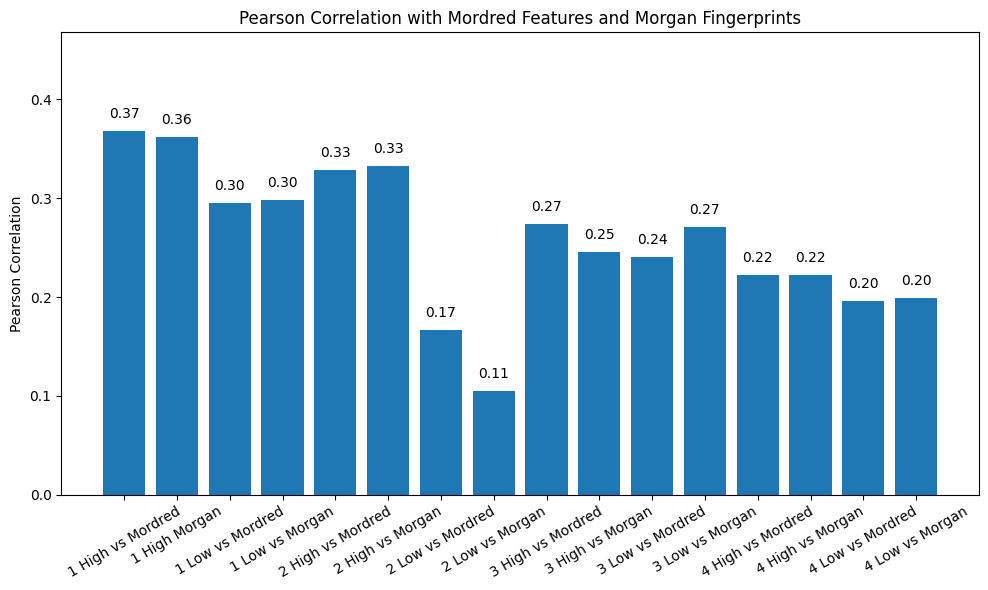

In [ ]:
import matplotlib.pyplot as plt

# Extract labels and values
labels = list(Correlation_results.keys())
values = list(Correlation_results.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values)

# Add value labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Customize plot
plt.ylabel('Pearson Correlation')
plt.title('Pearson Correlation with Mordred Features and Morgan Fingerprints')
plt.xticks(rotation=30)
plt.ylim(0, max(values) + 0.1)
plt.tight_layout()
plt.show()


In [ ]:
# Sample grouped data
labels = ['Mouse 1 High', 'Mouse 1 Low', 'Mouse 2 High', 'Mouse 2 Low', 'Mouse 3 High', 'Mouse 3 Low', 'Mouse 4 High', 'Mouse 4 Low']

# Correlation values for each condition
morgan_values = [one_high_morgan, one_low_morgan, two_high_morgan, two_low_morgan, three_high_morgan, three_low_morgan, four_high_morgan, four_low_morgan]
mordred_values = [one_high_mordred, one_low_mordred, two_high_mordred, two_low_mordred, three_high_mordred, three_low_mordred, four_high_mordred, four_low_mordred]

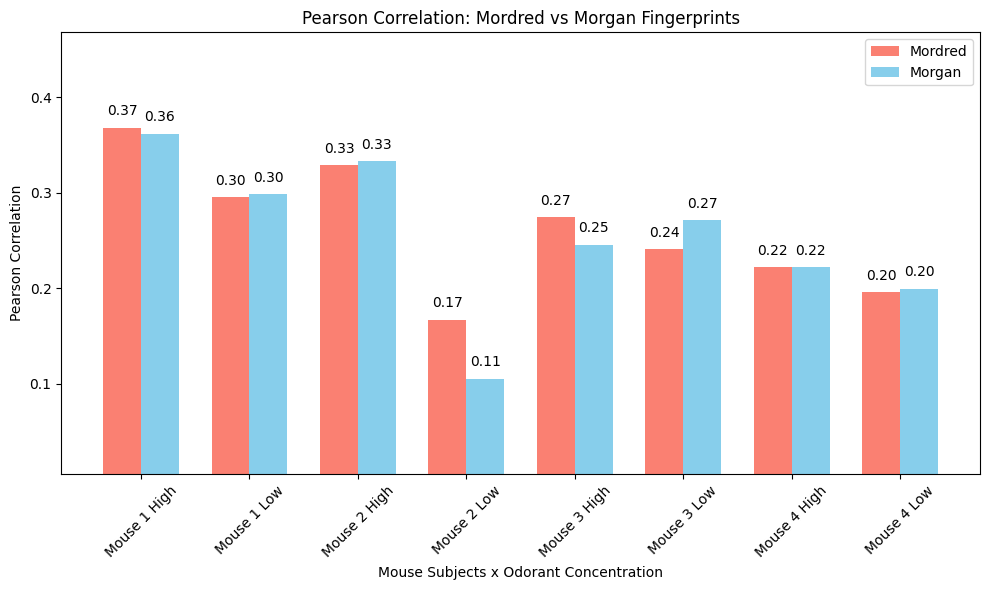

In [ ]:
# X positions
x = np.arange(len(labels))
bar_width = 0.35

# Create the bar plot (Mordred on the left)
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - bar_width/2, mordred_values, width=bar_width, label='Mordred', color='salmon')
bars2 = plt.bar(x + bar_width/2, morgan_values, width=bar_width, label='Morgan', color='skyblue')

# Add value labels on both bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    offset = 0.01 if yval >= 0 else -0.03  # Adjust label position based on sign
    va = 'bottom' if yval >= 0 else 'top'
    plt.text(bar.get_x() + bar.get_width()/2, yval + offset, f'{yval:.2f}', ha='center', va=va)

# Customize plot
plt.ylabel('Pearson Correlation')
plt.xlabel('Mouse Subjects x Odorant Concentration')
plt.title('Pearson Correlation: Mordred vs Morgan Fingerprints')
plt.xticks(x, labels, rotation=45)

# Adjust y-limits to accommodate negative values
ymin = min(min(morgan_values), min(mordred_values)) - 0.1
ymax = max(max(morgan_values), max(mordred_values)) + 0.1
plt.ylim(ymin, ymax)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
morgan_values = np.array(morgan_values)
mordred_values = np.array(mordred_values)

# Overall means
morgan_mean = morgan_values.mean()
mordred_mean = mordred_values.mean()

print(f"Mean Morgan Correlation: {morgan_mean:.3f}")
print(f"Mean Mordred Correlation: {mordred_mean:.3f}")

# Indices for "Low" and "High" conditions
low_idx = [i for i, label in enumerate(labels) if 'Low' in label]
high_idx = [i for i, label in enumerate(labels) if 'High' in label]

# Low concentration means
morgan_low_mean = morgan_values[low_idx].mean()
mordred_low_mean = mordred_values[low_idx].mean()

# High concentration means
morgan_high_mean = morgan_values[high_idx].mean()
mordred_high_mean = mordred_values[high_idx].mean()

print(f"Low concentration - Morgan mean: {morgan_low_mean:.3f}, Mordred mean: {mordred_low_mean:.3f}")
print(f"High concentration - Morgan mean: {morgan_high_mean:.3f}, Mordred mean: {mordred_high_mean:.3f}")


Mean Morgan Correlation: 0.254
Mean Mordred Correlation: 0.261
Low concentration - Morgan mean: 0.218, Mordred mean: 0.225
High concentration - Morgan mean: 0.290, Mordred mean: 0.298


# Statistical Significance Tests

In [ ]:
#Testing if morgan vs mordred paired samples are normal
from scipy.stats import shapiro

#Check if the difference between paired samples is normal
diffs = mordred_values - morgan_values
stat, p = shapiro(diffs)

if p > 0.05:
    print("Data is likely normal (use t-test)")
else:
    print("Data is not normal (use Wilcoxon)")

Data is likely normal (use t-test)


In [ ]:
#Paired t-test between Morgan and Mordred
from scipy.stats import ttest_rel

#Paired t-test
t_stat, p_value = ttest_rel(mordred_values, morgan_values)

#Print results
print("Paired t-test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Significant difference between Mordred and Morgan Pearson scores")
else:
    print("No significant difference between Mordred and Morgan Pearson scores")

Paired t-test Results:
t-statistic: 0.7162120708718216
p-value: 0.49705218474833934
No significant difference between Mordred and Morgan Pearson scores


In [ ]:
#Store Low and High values
high_values = np.array([one_high_mordred, one_high_morgan, two_high_mordred, two_high_morgan, three_high_mordred, three_high_morgan, four_high_mordred, four_high_morgan])
low_values = np.array([one_low_mordred, one_low_morgan, two_low_mordred, two_low_morgan, three_low_mordred, three_low_morgan, four_low_mordred, four_low_morgan])

In [ ]:
#Testing if high vs low paired samples are normal
from scipy.stats import shapiro

#Check if the difference between paired samples is normal
diffs_lh = high_values - low_values
stat_lh, p_lh = shapiro(diffs_lh)

if p_lh > 0.05:
    print("Data is likely normal (use t-test)")
else:
    print("Data is not normal (use Wilcoxon)")

Data is likely normal (use t-test)


In [ ]:
#Paired t-test between High and Low Concentrations

#Paired t-test
t_stat_lh, p_value_lh = ttest_rel(high_values, low_values)

#Print results
print("Paired t-test Results:")
print("t-statistic:", t_stat_lh)
print("p-value:", p_value_lh)

alpha = 0.05
if p_value_lh < alpha:
    print("Significant difference between High and Low Pearson scores")
else:
    print("No significant difference between High and Low Pearson scores")

Paired t-test Results:
t-statistic: 2.4909108238276256
p-value: 0.041541148123967725
Significant difference between High and Low Pearson scores


In [ ]:
# Remove Mouse 2 (index 2) from both arrays
high_no_mouse2 = np.delete(high_values, 2)
low_no_mouse2 = np.delete(low_values, 2)

# Perform paired t-test
t_stat_lh, p_value_lh = ttest_rel(high_no_mouse2, low_no_mouse2)

# Print results
print("Paired t-test Results (excluding Mouse 2):")
print("t-statistic:", t_stat_lh)
print("p-value:", p_value_lh)

if p_value_lh < 0.05:
    print("Significant difference between High and Low Pearson(Mouse 2 excluded) scores")
else:
    print("No significant difference between High and Low Pearson(Mouse 2 excluded) scores")

Paired t-test Results (excluding Mouse 2):
t-statistic: 1.9774157015994915
p-value: 0.09536490960553107
No significant difference between High and Low Pearson(Mouse 2 excluded) scores
